<font size=8> Exploratory Data Analysis<font>

<font size =5>Objective:

    - What is EDA?
    - Descriptive Analysis - five point summary
    - Visualization - overview of matplotlib, seaborn, plotly
    - Univaraite Analysis - histogram(continous) , boxplot(continous),countplot(categorical)
    - Bivariate Analysis - Scatterplot (continous), barplot(categorical),stripplot(continous-categorical)
    - Multivariate Analysis - introducing hues, pairplot, heatmap 

# What is EDA
- Used to analyse a dataset and understand its key characteristics
- Understand patterns in the data and form hypothesis
- Identify Outliers, missing data, incorrect data


# FitForever Case Study - Descriptive Statistics
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by FitForever. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a FitForever retail store during the prior three months. The data are stored in the FitForeverCaseStudy.csv file.

### The team identifies the following customer variables to study: 
  - product purchased, TM195, TM498, or TM798; 
  - gender; 
  - age, in years; 
  - education, in years; 
  - relationship status, single or partnered; 
  - annual household income ; 
  - average number of times the customer plans to use the treadmill each week; 
  - average number of miles the customer expects to walk/run each week; 
  - and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

In [2]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data
customer_data = pd.read_csv('FitForeverCaseStudy.csv')

In [4]:
#check the correctness of data loading
customer_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.7+ KB


In [6]:
#creating a copy of the data before altering anything
customer_data_copy = customer_data.copy()

In [7]:
#changing numerical categorical columns into category type object
for col in ['Education', 'Usage', 'Fitness']:
    customer_data[col] = customer_data[col].astype('category')

With 5 point summary,we can see the following things:

- range of the data
- Interquartile range
- difference between mean and median(50%). 
- if the mean and median coincide or closer to each other, not much skewness in data
- if the mean is on left side of the median , data is left skewed
- if the mean is on right side of the median, data is right skewed
- if the standard deviation is very large (keeping in view with the range) , the data is very sparsely distributed.

In [8]:
#five point summary
#gives the 5 five point summary for all continous varible in the data
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


Age:

- range -> 18 to 20
- the middle representative population is from 24 to 33 years in age
- not much skewness in the data

Income:

- range 30k to 100k
- most representative population -> 44k to 58k
- mean on right side -> data right skewed
- std is very high

Miles:

- range 21 to 360
- most representative population -> 66 to 114
- mean on right side -> data right skewed
- std is very high

# Visualization

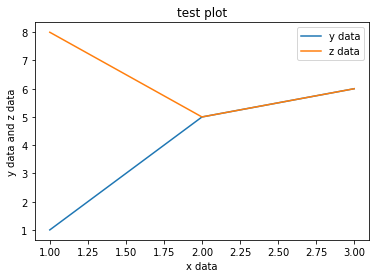

In [9]:
#sample matplotlib example
x = [1,2,3]
y = [1,5,6]
z = [8,5,6]
plt.plot(x,y)
plt.plot(x,z)
plt.xlabel('x data')
plt.ylabel('y data and z data')
plt.title('test plot')
plt.legend(['y data','z data'])
plt.show()


# Univariate Analysis

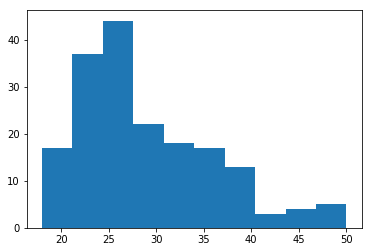

In [10]:
plt.hist(customer_data.Age)
plt.show()

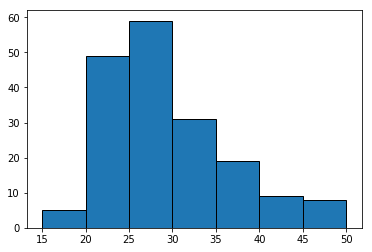

In [11]:
bins = [15,20,25,30,35,40,45,50]
plt.hist(customer_data.Age,bins, edgecolor = 'black')
plt.show()

we can observe that most of the customers are aged between 20 to 30

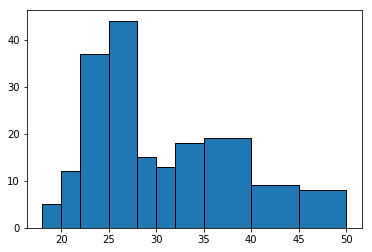

In [12]:
bins = [18,20,22,25,28,30,32,35,40,45,50]
plt.hist(customer_data.Age,bins, edgecolor = 'black')
plt.show()

Observations:

- The number of customers in the age range 22 to 28 is the greatest.
- we have very less customers above age 40  (nearly 10 percentage).
- Nearly 90 percent of our customers are in the age range 20 to 40.

In [13]:
customer_data.Product.unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [14]:
grouped_data = customer_data.groupby(customer_data.Product)
TM195_data = grouped_data.get_group('TM195')
TM498_data = grouped_data.get_group('TM498')
TM798_data = grouped_data.get_group('TM798')

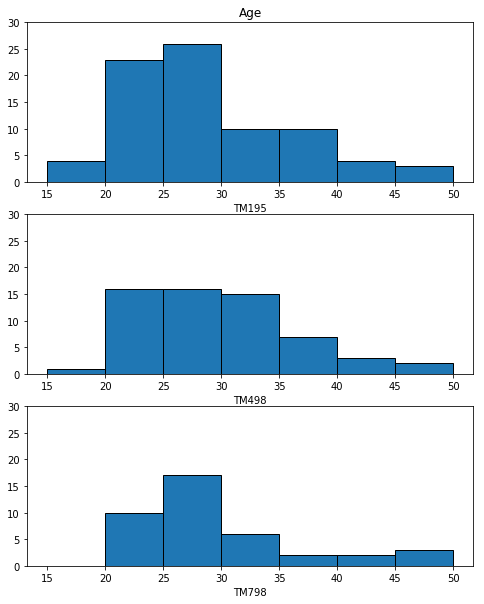

In [23]:
bins = [15,20,25,30,35,40,45,50]
plt.subplots(3,1 ,figsize = (8,10))
plt.subplot(311)
plt.title('Age')
plt.hist(TM195_data.Age,bins, edgecolor = 'black')
plt.ylim(0,30)
plt.xlabel('TM195')
plt.subplot(312)
plt.hist(TM498_data.Age,bins, edgecolor = 'black')
plt.ylim(0,30)
plt.xlabel('TM498')
plt.subplot(313)
plt.hist(TM798_data.Age,bins, edgecolor = 'black')
plt.ylim(0,30)
plt.xlabel('TM798')
plt.show()

Observation:

- 20 to 30 age group are the major buyers of TM195
- 20 to 35 age group are the major buyers of TM498
- 25 to 30 age group are the major buyers of TM798

Inference:

- the most buyers are in the age group 20 to 30. we cannot determine the preference of the customer based on their age.

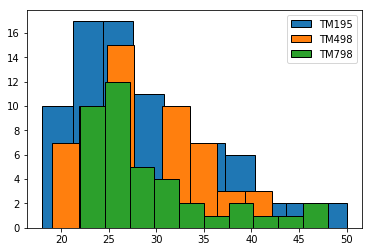

In [74]:
plt.hist(TM195_data.Age, edgecolor = 'black')
plt.hist(TM498_data.Age, edgecolor = 'black')
plt.hist(TM798_data.Age, edgecolor = 'black')
plt.legend (['TM195','TM498','TM798'])
plt.show()

As seen earlier the age is distributed across all products. we cannot categorize the customer profile based on age.

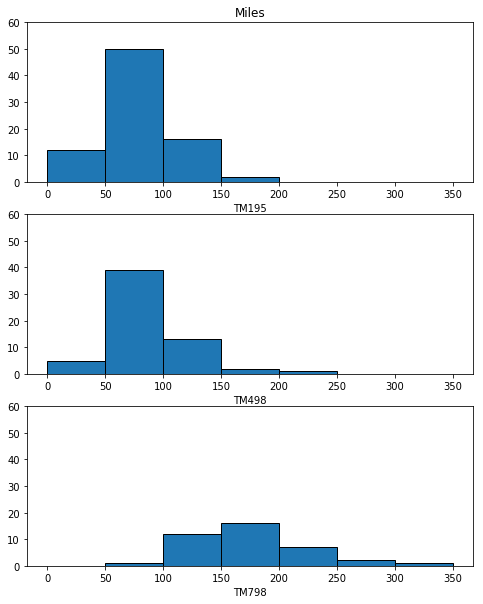

In [24]:
bins = range(0, 400, 50)
plt.subplots(3,1 ,figsize = (8,10))
plt.subplot(311)
plt.title('Miles')
plt.hist(TM195_data.Miles,bins, edgecolor = 'black')
plt.ylim(0,60)
plt.xlabel('TM195')
plt.subplot(312)
plt.hist(TM498_data.Miles,bins, edgecolor = 'black')
plt.ylim(0,60)
plt.xlabel('TM498')
plt.subplot(313)
plt.hist(TM798_data.Miles,bins, edgecolor = 'black')
plt.ylim(0,60)
plt.xlabel('TM798')
plt.show()

observation:

- TM195 is bought by people who are planning to run upto 200 miles
- TM498 is bought by people who are planning to run upto 250 miles
- TM798 is bought by people who are planning to run upto 360 miles


inference:

- TM195 is a low end model, used by beginners and non-professionals
- TM498 is a medium range model
- TM798 is a high end model preferred by people planning to run more number of miles
- Based on the number of miles a user is planning to run, we can predict the preference of the customer.

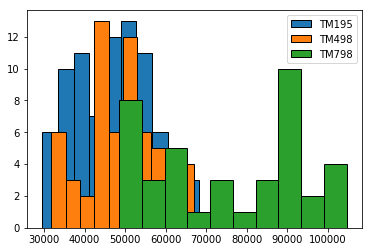

In [76]:
plt.hist(TM195_data.Income, edgecolor = 'black')
plt.hist(TM498_data.Income, edgecolor = 'black')
plt.hist(TM798_data.Income, edgecolor = 'black')
plt.legend (['TM195','TM498','TM798'])
plt.show()

observation:

- TM195 is bought by people whose income ranges from 30k to 65k
- TM498 is bought by people whose income ranges from 30k to 65k
- TM798 is bought by people whose income ranges from 50k to 100k


inference:

- TM195 is low cost compared to other models
- TM498 is also in lower price range
- TM798 is an expensive model compared to others.
- income range is also a good predictor in finding the prefernce of the customer.

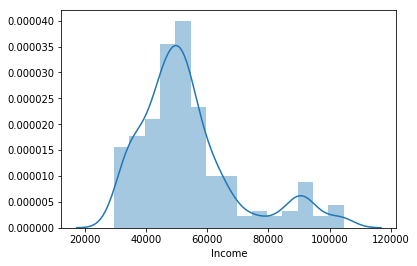

In [77]:
sns.distplot(customer_data.Income)

The income range of the people is showing two peaks and looks like the data is rightskewed indicating outliers on the right

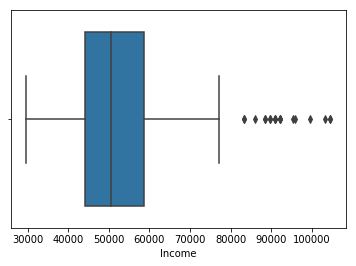

In [78]:
sns.boxplot(customer_data.Income)

observation:
 
- as seen in the earlier plot , outliers are present on the higher values of the data.
- the data is uniformly distributed in the IQR

inference:

- our customers are widely spread in the higher income range

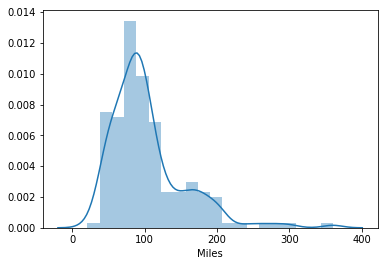

In [79]:
sns.distplot(customer_data.Miles)

our customers are widely spread in the higher miles range

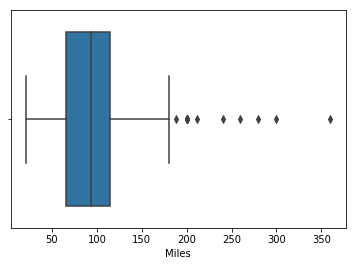

In [80]:
sns.boxplot(customer_data.Miles)

observation:
 
- outliers are present on the higher values of the data.
- our customers are planning to run more than 180 miles
- the data is uniformly distributed in the IQR


inference:

- our customers are widely spread in the higher Miles range

In [81]:
customer_data[customer_data['Miles'] > 180]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,TM195,24,Female,16,Partnered,5,5,44343,188
84,TM498,21,Female,14,Partnered,5,4,34110,212
142,TM798,22,Male,18,Single,4,5,48556,200
148,TM798,24,Female,16,Single,5,5,52291,200
152,TM798,25,Female,18,Partnered,5,5,61006,200
155,TM798,25,Male,18,Partnered,6,5,75946,240
166,TM798,29,Male,14,Partnered,7,5,85906,300
167,TM798,30,Female,16,Partnered,6,5,90886,280
170,TM798,31,Male,16,Partnered,6,5,89641,260
171,TM798,33,Female,18,Partnered,4,5,95866,200


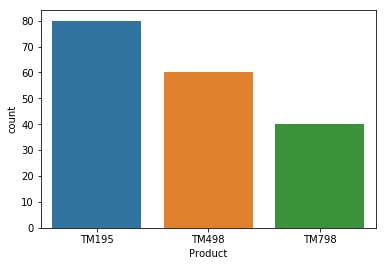

In [82]:
sns.countplot(customer_data.Product)

***Observation***

- TM195 is the most sold model in the last 3 months.
- The ranking is in the order - > TM195 , TM498 , TM798
- The ratio is approx 4:3:2
- The number of customers prefering TM195 is almost twice as the ones prefering TM798

***Inferences***
- we can guess that TM195 is more economical model or popular model compared to the other two models.


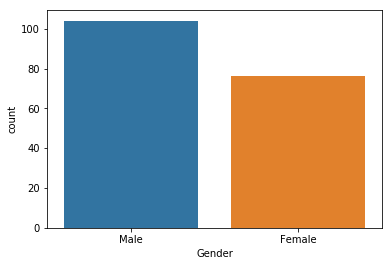

In [83]:
sns.countplot(customer_data.Gender)

Male to female customers are in the ratio 4:3

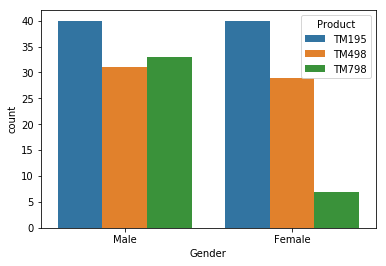

In [84]:
sns.countplot(customer_data.Gender, hue=customer_data.Product)

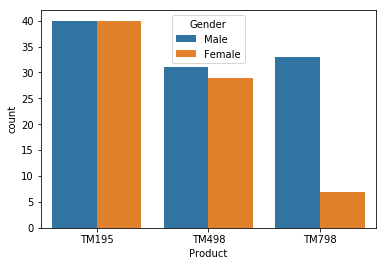

In [85]:
sns.countplot(customer_data.Product, hue=customer_data.Gender)

observation:

- TM195 is bought by equal number of male and female
- TM498 is bought by equal number of male and female
- TM798 is bought more by male than female
- Number of male and female does not vary much between the products.

Inference:

- Gender is not a great predictor for the preference of the customer
 

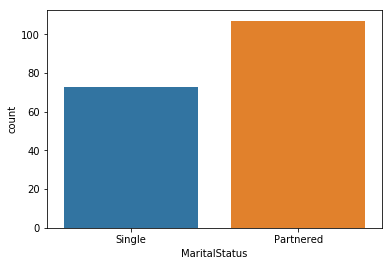

In [28]:
sns.countplot(customer_data.MaritalStatus)

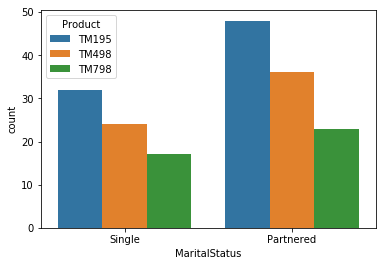

In [29]:
sns.countplot(customer_data.MaritalStatus, hue=customer_data.Product)

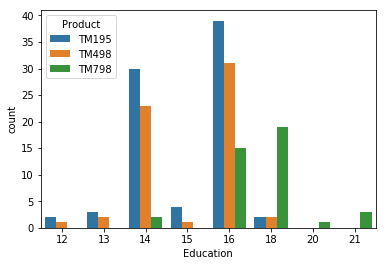

In [86]:
sns.countplot(customer_data.Education, hue=customer_data.Product)

observation:

- customer with education of 16 years are the greatest buyers of our product
- Again education is not a best predictor of customer preference

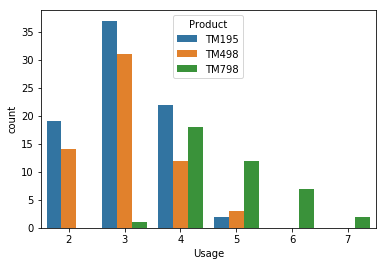

In [35]:
sns.countplot(customer_data.Usage, hue=customer_data.Product)

observation:

- TM195 is used by customers who are planning to use from 2 to 5 times a week
- TM498 is used by customers who are planning to use from 2 to 5 times a week
- TM798 is used by customers who are planning to use from 3 to 7 times a week

inference:

- TM195 and TM498 are prefered by customers who are planning to use moderately.
- TM798 are prefered by customers who are planning for a heavy usage.

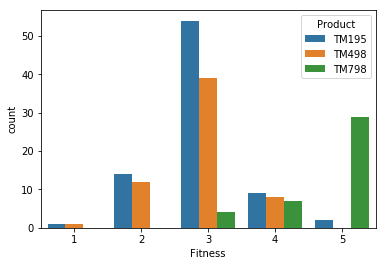

In [88]:
sns.countplot(customer_data.Fitness, hue=customer_data.Product)

observation:

- TM195 is used by customers whose self rated fitness is 1 to 5
- TM498 is used by customers whose self rated fitness is 1 to 4
- TM798 is used by customers whose self rated fitness is 3 to 5
- Many customers have rated themselves with a fitness level of 3

inference:

- TM195 and TM498 are bought by customers of varied fitness level
- TM798 are who rate themselves with high fitness.

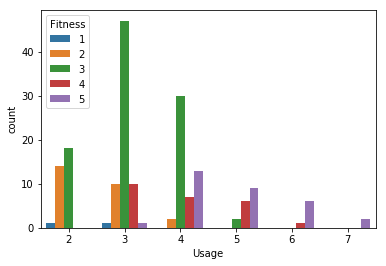

In [30]:
sns.countplot(customer_data.Usage, hue=customer_data.Fitness)

# Bivariate Analysis

ScatterPlot:

- if the data in y axis, increases with the data in x axis , then data is positively correlated
- if the data in y axis, decreases with the data in x axis , then data is negatively correlated
- if the data in y axis, does not increase or decrease with the data in x axis , then data does not show any correlation

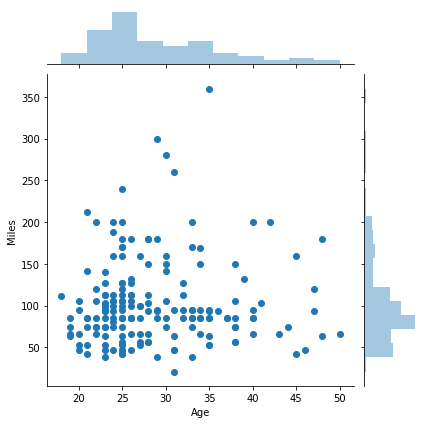

In [131]:
sns.jointplot(x='Age', y ='Miles', data = customer_data)

There is no definite pattern between age and miles

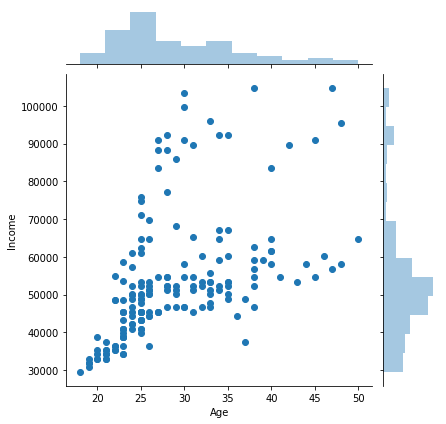

In [90]:
sns.jointplot(x='Age', y ='Income' ,data = customer_data)

Age and income seems to be positively correlated

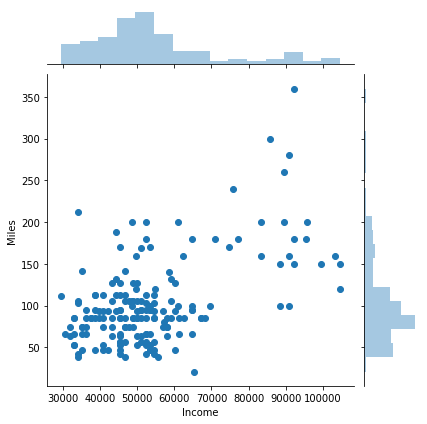

In [91]:
sns.jointplot(x='Income', y ='Miles' ,data = customer_data)

A slight positive correlation can be observed between Income and Miles.
This may be due to the fact that the high income people are buying TM798 model which has higher range of Miles.

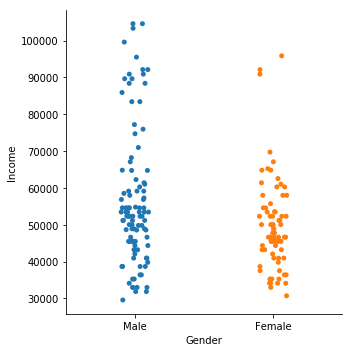

In [132]:
sns.catplot(x='Gender' , y = 'Income', data = customer_data)

Male customers have higher income range compared to female customers.

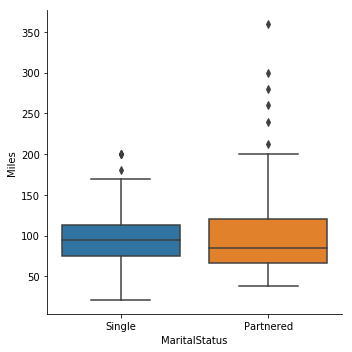

In [133]:
sns.catplot(x='MaritalStatus' , y = 'Miles', data = customer_data , kind = "box")

In [ ]:
Partnered customers are planning to run more miles compared to single customers.

# Multivariate Analysis

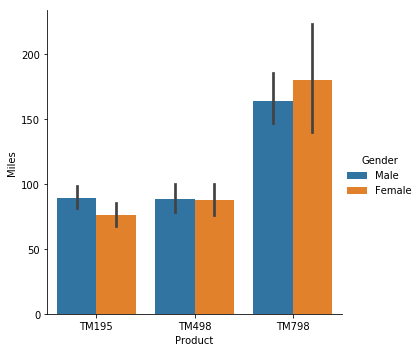

In [94]:
sns.catplot(x='Product' , y = 'Miles', hue='Gender', data = customer_data , kind = 'bar')

Observation:

- TM195 :  average planned miles male:90; female:80
- TM498 :  average planned miles male:90; female:90
- TM798 :  average planned miles male:170; female:180

Inference:

- Mostly male and female are planning to run equally
- Average planned number of miles run by users of TM195 and TM498 are almost similar
- Average planned number of miles run by users of TM798 is in the higher range


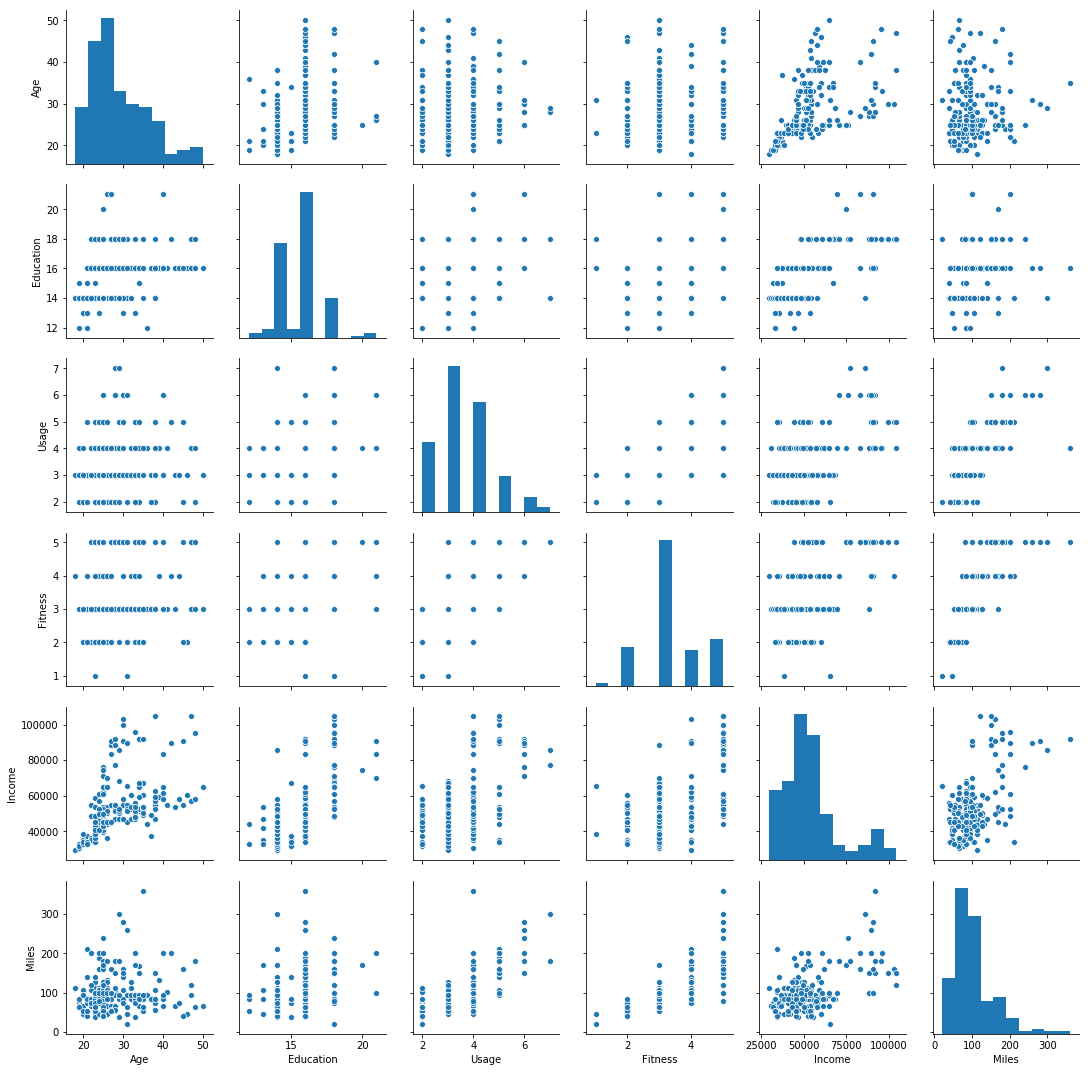

In [33]:
sns.pairplot(customer_data)
#sns.pairplot(customer_data , diag_kind = 'kde')
#sns.pairplot(customer_data , hue = 'Product')


In [103]:
corr = customer_data_copy.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


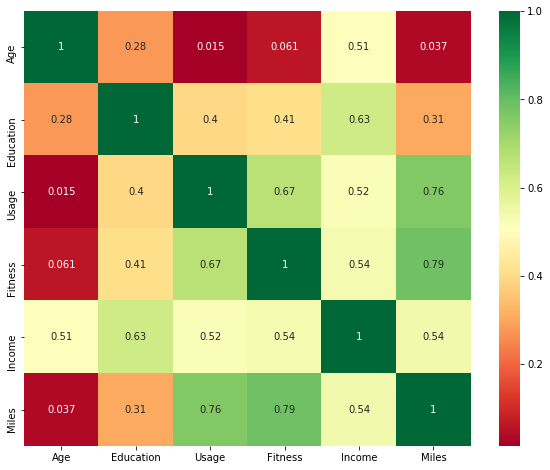

In [104]:
#heatmap helps in visualization of different strengths.Here it is used to visualize correlation.
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='RdYlGn')

we can find high correlation between the following values

 - Miles and Fitness
 - Usage and Miles
 - Usage and Fitness
 - Education and Income

In [101]:
customer_data_copy.groupby(customer_data.Product).mean()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
TM498,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
TM798,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


# Summary

# Title : TM195 most economical and beginners choice; TM798 - Expert level fitness choice

#  TM195 and TM498 customer characters does not vary much 

***TM195***

- most popular
- prefered among people with lower income range , fitness level equal to or less than 3 , Usage less than 4 times a week.

***TM498***

- less popular than TM195
- with low income group , moderate fitness level

***TM798***

- Least sold
- High end model
- prefered among people with higher income range , fitness level greater than 3 , Usage more than 4 times a week.

***Technical summary***

- Many data are right skewed.
- May encounter class imbalance problem.
